In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df_control = pd.read_csv('control_group.csv', delimiter=';')
df_test = pd.read_csv('test_group.csv', delimiter=';')

In [3]:
print(df_control)

       Campaign Name        Date  Spend [USD]  # of Impressions     Reach  \
0   Control Campaign   1.08.2019         2280           82702.0   56930.0   
1   Control Campaign   2.08.2019         1757          121040.0  102513.0   
2   Control Campaign   3.08.2019         2343          131711.0  110862.0   
3   Control Campaign   4.08.2019         1940           72878.0   61235.0   
4   Control Campaign   5.08.2019         1835               NaN       NaN   
5   Control Campaign   6.08.2019         3083          109076.0   87998.0   
6   Control Campaign   7.08.2019         2544          142123.0  127852.0   
7   Control Campaign   8.08.2019         1900           90939.0   65217.0   
8   Control Campaign   9.08.2019         2813          121332.0   94896.0   
9   Control Campaign  10.08.2019         2149          117624.0   91257.0   
10  Control Campaign  11.08.2019         2490          115247.0   95843.0   
11  Control Campaign  12.08.2019         2319          116639.0  100189.0   

In [4]:
print(df_test)

    Campaign Name        Date  Spend [USD]  # of Impressions   Reach  \
0   Test Campaign   1.08.2019         3008             39550   35820   
1   Test Campaign   2.08.2019         2542            100719   91236   
2   Test Campaign   3.08.2019         2365             70263   45198   
3   Test Campaign   4.08.2019         2710             78451   25937   
4   Test Campaign   5.08.2019         2297            114295   95138   
5   Test Campaign   6.08.2019         2458             42684   31489   
6   Test Campaign   7.08.2019         2838             53986   42148   
7   Test Campaign   8.08.2019         2916             33669   20149   
8   Test Campaign   9.08.2019         2652             45511   31598   
9   Test Campaign  10.08.2019         2790             95054   79632   
10  Test Campaign  11.08.2019         2420             83633   71286   
11  Test Campaign  12.08.2019         2831            124591   10598   
12  Test Campaign  13.08.2019         1972             65827   4

In [5]:
# Descriptive statistics
print("Control Group Descriptive Statistics:")
print(df_control.describe())
print("\nTest Group Descriptive Statistics:")
print(df_test.describe())

Control Group Descriptive Statistics:
       Spend [USD]  # of Impressions          Reach  # of Website Clicks  \
count    30.000000         29.000000      29.000000            29.000000   
mean   2288.433333     109559.758621   88844.931034          5320.793103   
std     367.334451      21688.922908   21832.349595          1757.369003   
min    1757.000000      71274.000000   42859.000000          2277.000000   
25%    1945.500000      92029.000000   74192.000000          4085.000000   
50%    2299.500000     113430.000000   91579.000000          5224.000000   
75%    2532.000000     121332.000000  102479.000000          6628.000000   
max    3083.000000     145248.000000  127852.000000          8137.000000   

       # of Searches  # of View Content  # of Add to Cart  # of Purchase  
count      29.000000          29.000000         29.000000      29.000000  
mean     2221.310345        1943.793103       1300.000000     522.793103  
std       866.089368         777.545469        407.4

In [6]:
print(df_control.isnull().sum())
print(df_test.isnull().sum())

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64


In [7]:
#Rename columns
df_control.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

df_test.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [8]:
#fill in missing values in control data
df_control["Number of Impressions"].fillna(value=df_control["Number of Impressions"].mean(), 
                                             inplace=True)
df_control["Reach"].fillna(value=df_control["Reach"].mean(), 
                             inplace=True)
df_control["Website Clicks"].fillna(value=df_control["Website Clicks"].mean(), 
                                      inplace=True)
df_control["Searches Received"].fillna(value=df_control["Searches Received"].mean(), 
                                         inplace=True)
df_control["Content Viewed"].fillna(value=df_control["Content Viewed"].mean(), 
                                      inplace=True)
df_control["Added to Cart"].fillna(value=df_control["Added to Cart"].mean(), 
                                     inplace=True)
df_control["Purchases"].fillna(value=df_control["Purchases"].mean(), 
                                 inplace=True)

In [9]:
#merge datasets
ab_data = df_control.merge(df_test, 
                             how="outer").sort_values(["Date"])
ab_data = ab_data.reset_index(drop=True)
print(ab_data.head())

      Campaign Name        Date  Amount Spent  Number of Impressions    Reach  \
0  Control Campaign   1.08.2019          2280                82702.0  56930.0   
1     Test Campaign   1.08.2019          3008                39550.0  35820.0   
2     Test Campaign  10.08.2019          2790                95054.0  79632.0   
3  Control Campaign  10.08.2019          2149               117624.0  91257.0   
4     Test Campaign  11.08.2019          2420                83633.0  71286.0   

   Website Clicks  Searches Received  Content Viewed  Added to Cart  Purchases  
0          7016.0             2290.0          2159.0         1819.0      618.0  
1          3038.0             1946.0          1069.0          894.0      255.0  
2          8125.0             2312.0          1804.0          424.0      275.0  
3          2277.0             2475.0          1984.0         1629.0      734.0  
4          3750.0             2893.0          2617.0         1075.0      668.0  


C:\Users\IBoudellioua\AppData\Local\Temp\ipykernel_12160\2464668849.py:2: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  ab_data = df_control.merge(df_test,


In [10]:
print(ab_data["Campaign Name"].value_counts())

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64


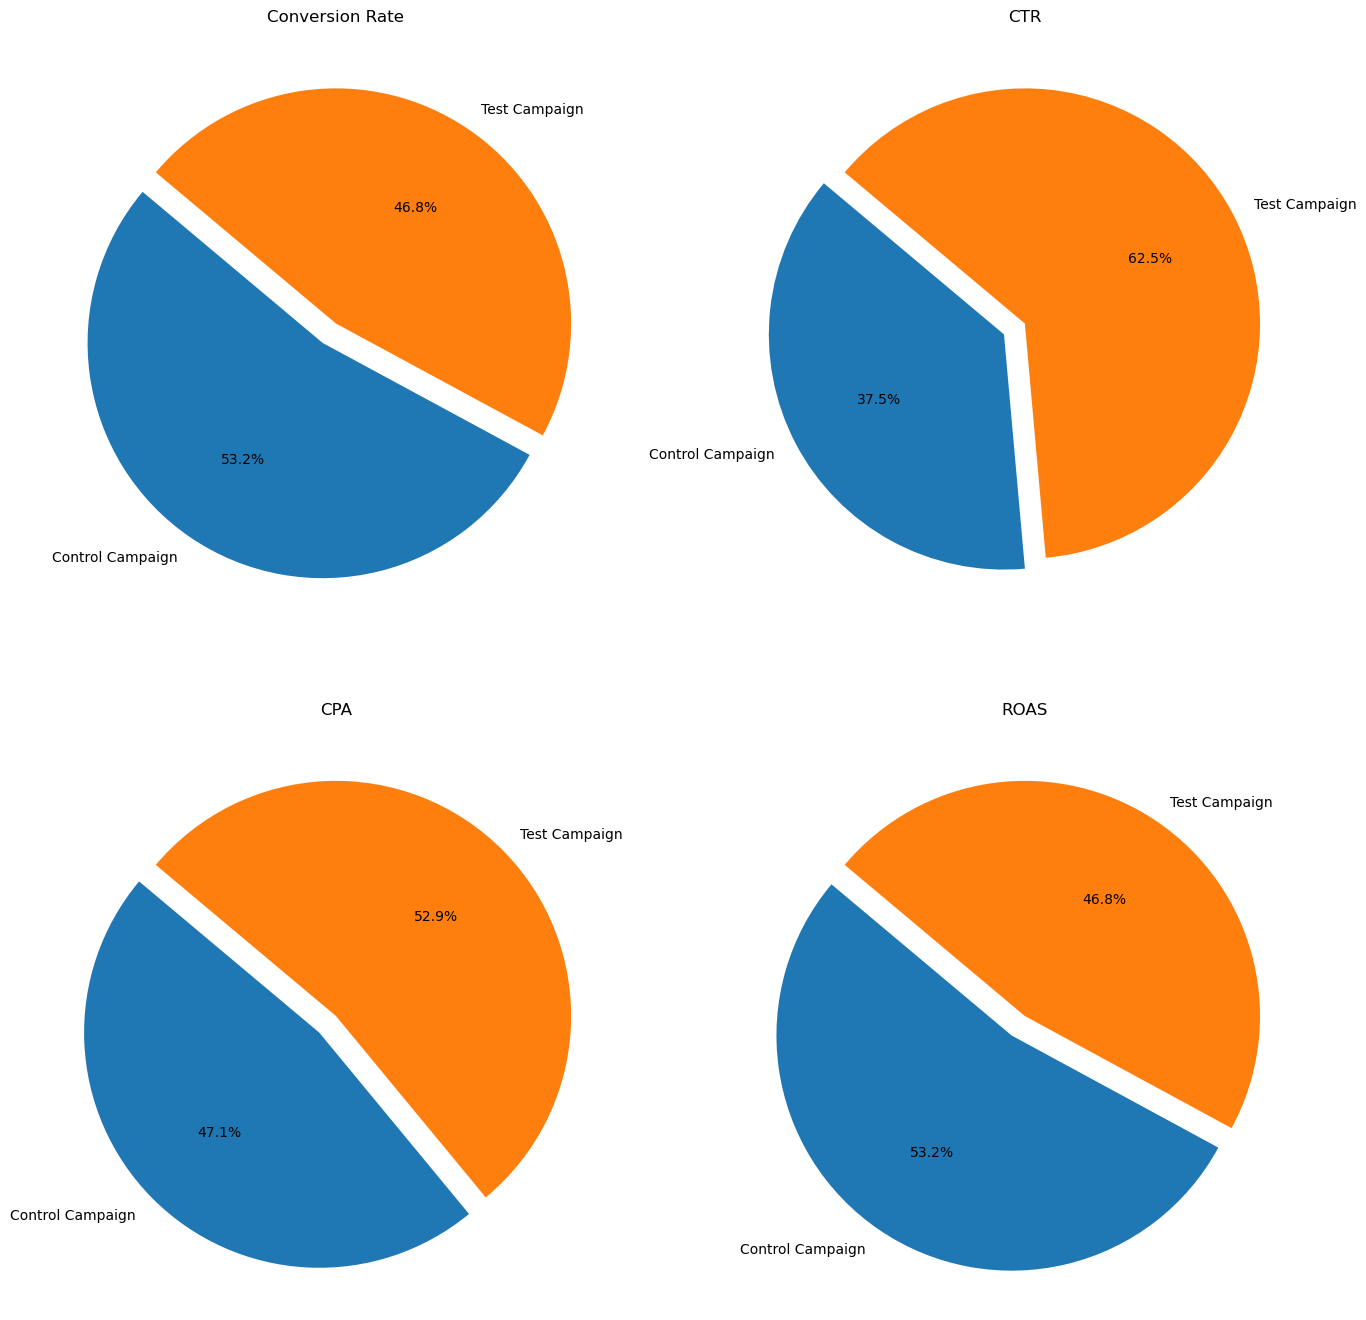

In [13]:
import matplotlib.pyplot as plt

# Assuming the KPIs have already been calculated as follows:
kpis = {
    'Conversion Rate': {'Control Campaign': 9.83, 'Test Campaign': 8.64},
    'CTR': {'Control Campaign': 4.86, 'Test Campaign': 8.09},
    'CPA': {'Control Campaign': 4.38, 'Test Campaign': 4.92},
    'ROAS': {'Control Campaign': 1042.25, 'Test Campaign': 916.82}
}

# Function to plot pie charts for KPI comparisons
def plot_pie_charts(kpis):
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    axes = axes.flatten()
    
    for idx, (kpi, data) in enumerate(kpis.items()):
        sizes = list(data.values())
        labels = list(data.keys())
        axes[idx].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
        axes[idx].set_title(kpi)

    plt.tight_layout()
    plt.show()

plot_pie_charts(kpis)


Control Campaign - Purchases: Shapiro-Wilk Test Stat=0.9433, p-value=0.1114
  Data appears to be normally distributed.



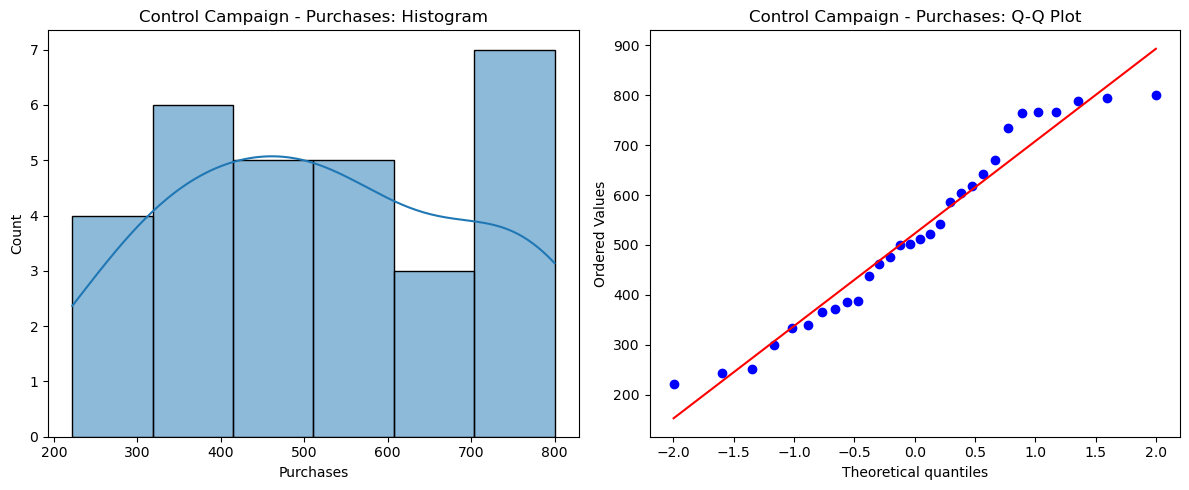

Control Campaign - Website Clicks: Shapiro-Wilk Test Stat=0.9632, p-value=0.3731
  Data appears to be normally distributed.



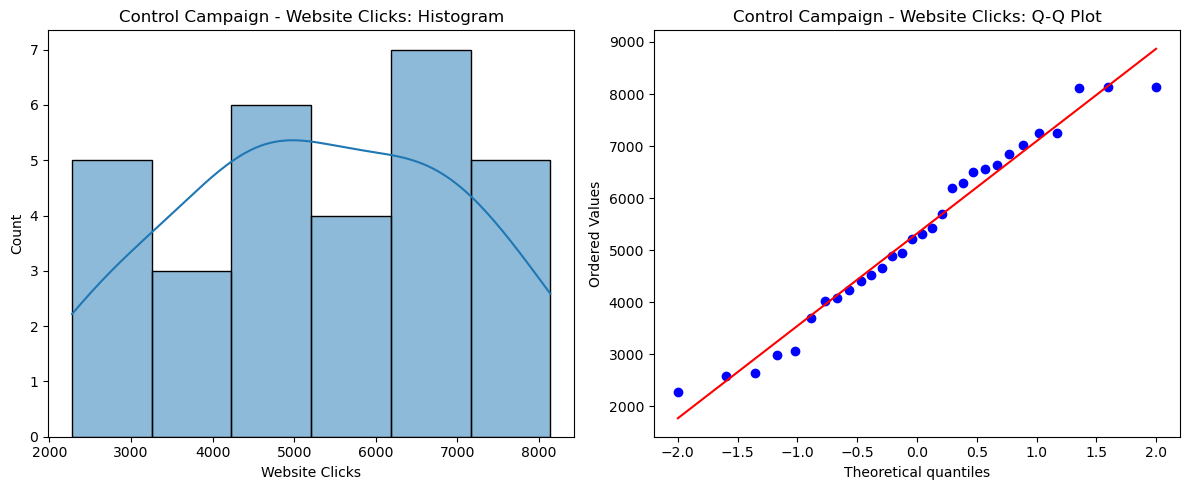

Control Campaign - Amount Spent: Shapiro-Wilk Test Stat=0.9551, p-value=0.2313
  Data appears to be normally distributed.



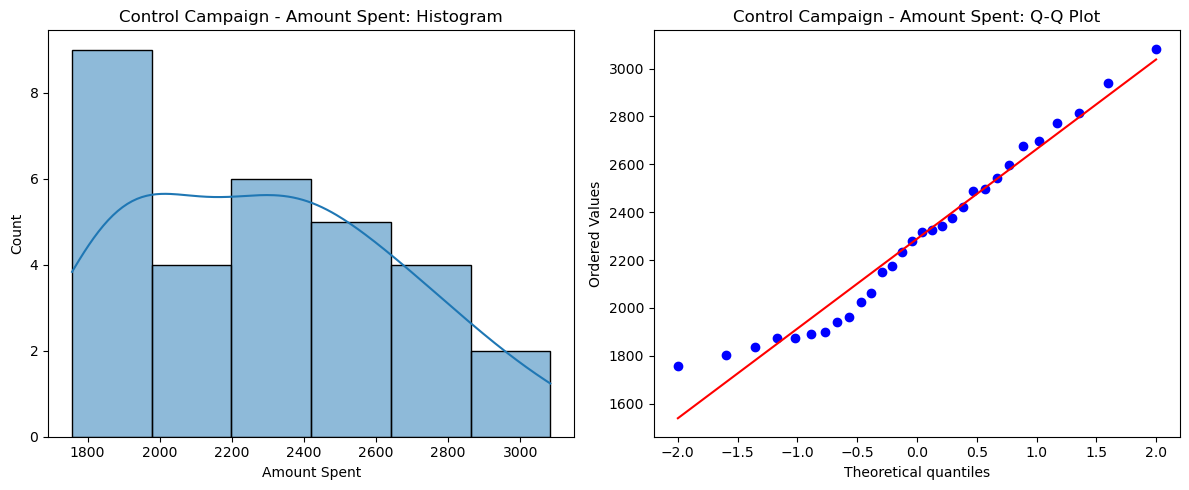

Control Campaign - Number of Impressions: Shapiro-Wilk Test Stat=0.9437, p-value=0.1145
  Data appears to be normally distributed.



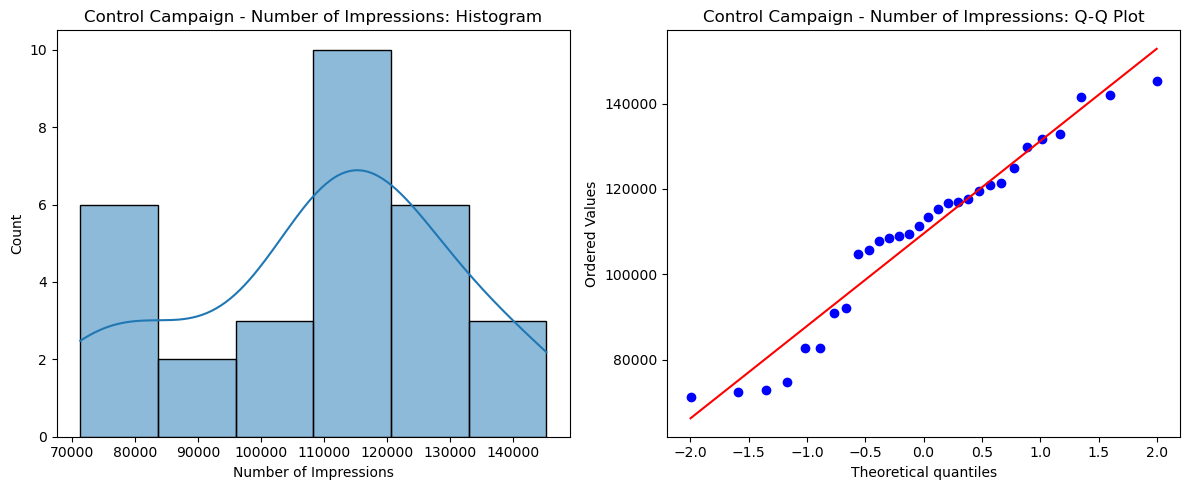

Test Campaign - Purchases: Shapiro-Wilk Test Stat=0.9182, p-value=0.02408
  Data does not appear to be normally distributed.



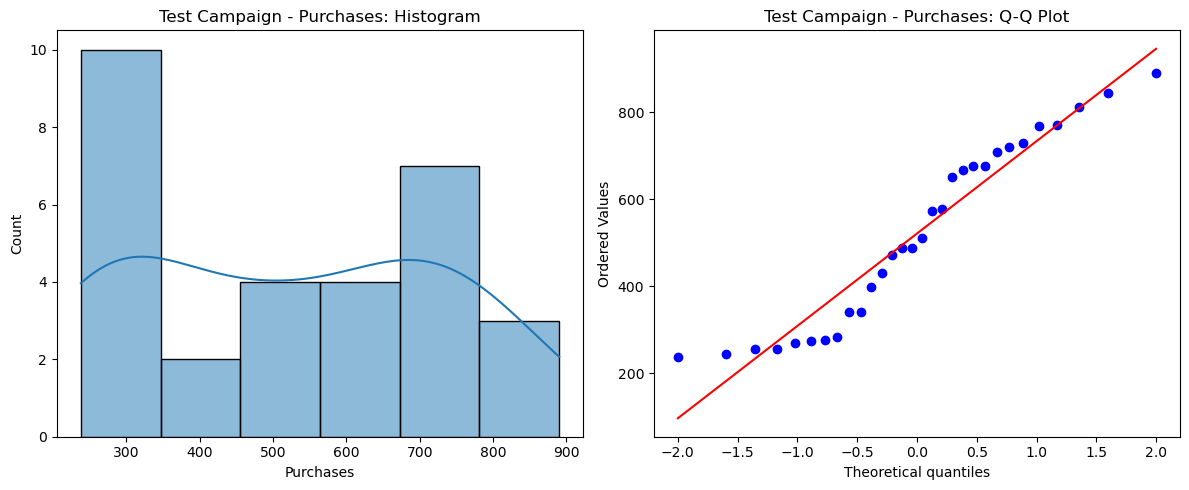

Test Campaign - Website Clicks: Shapiro-Wilk Test Stat=0.9062, p-value=0.01198
  Data does not appear to be normally distributed.



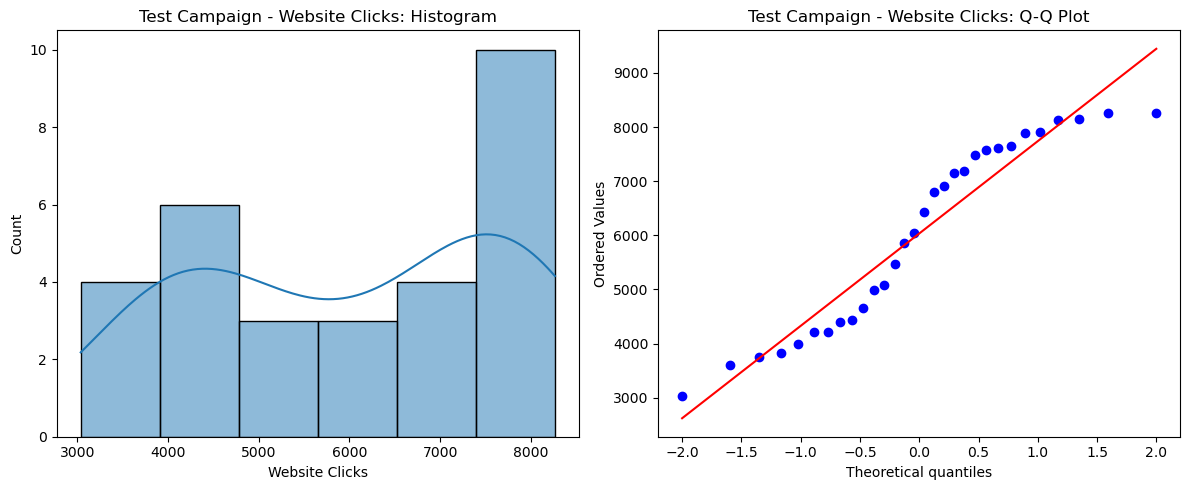

Test Campaign - Amount Spent: Shapiro-Wilk Test Stat=0.9441, p-value=0.1171
  Data appears to be normally distributed.



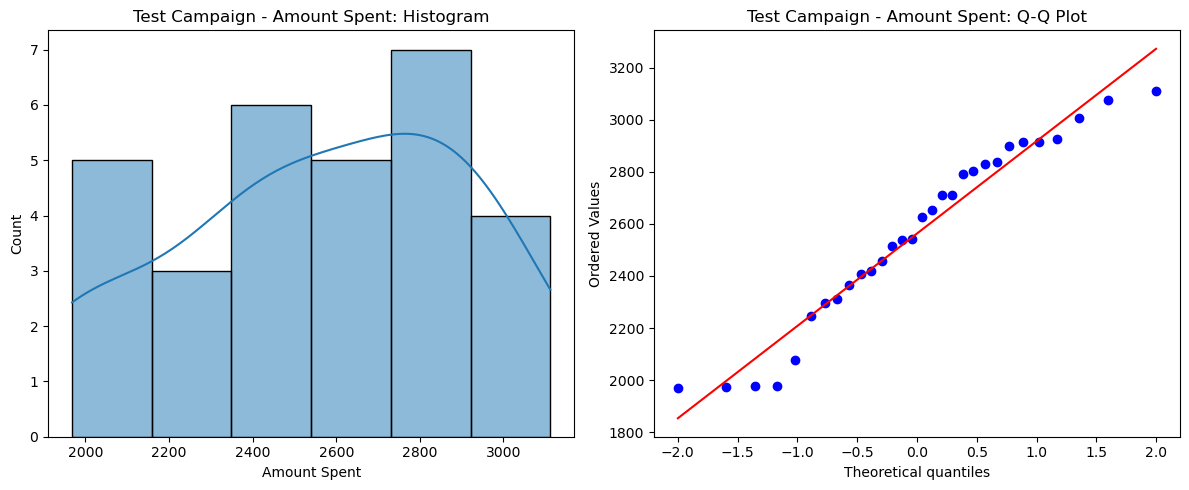

Test Campaign - Number of Impressions: Shapiro-Wilk Test Stat=0.9485, p-value=0.1537
  Data appears to be normally distributed.



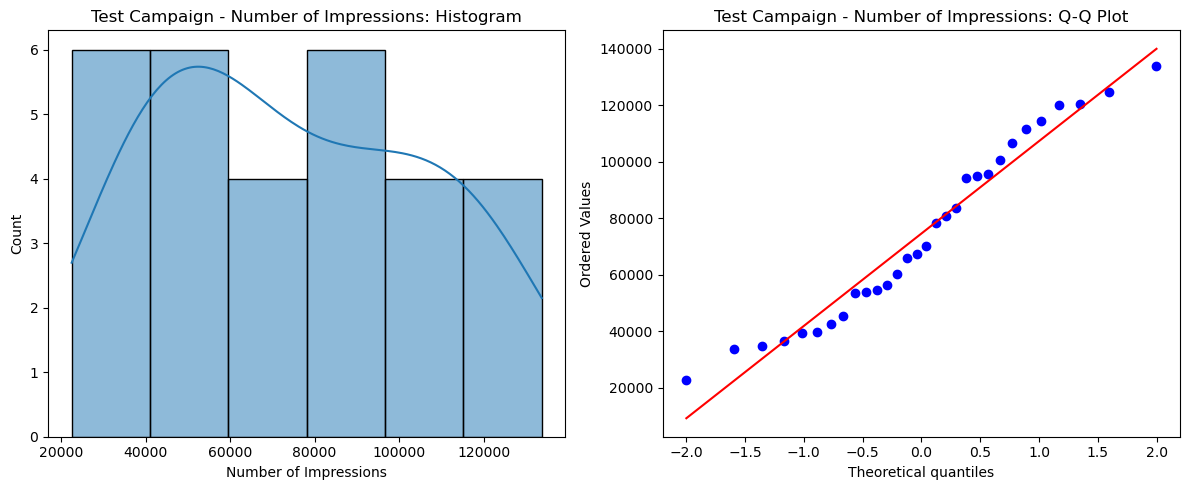

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform Shapiro-Wilk test and visual assessments
def check_normality_and_visualize(df, metric, campaign_type):
    # Filter data based on campaign type
    sample = df[df['Campaign Name'] == campaign_type][metric].dropna()
    
    # Shapiro-Wilk test
    stat, p = stats.shapiro(sample)
    print(f"{campaign_type} - {metric}: Shapiro-Wilk Test Stat={stat:.4f}, p-value={p:.4g}")
    if p > 0.05:
        print("  Data appears to be normally distributed.\n")
    else:
        print("  Data does not appear to be normally distributed.\n")
    
    # Histogram for visual inspection
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(sample, kde=True)
    plt.title(f'{campaign_type} - {metric}: Histogram')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(sample, dist="norm", plot=plt)
    plt.title(f'{campaign_type} - {metric}: Q-Q Plot')

    plt.tight_layout()
    plt.show()

# Metrics to analyze
metrics = ['Purchases', 'Website Clicks', 'Amount Spent', 'Number of Impressions']
campaign_types = ab_data['Campaign Name'].unique()

# Perform normality tests and visualizations for each metric and campaign type
for campaign_type in campaign_types:
    for metric in metrics:
        check_normality_and_visualize(ab_data, metric, campaign_type)


Purchases - Mann-Whitney U: Stat=455.0000, p-value=0.947
No significant difference found for Purchases.



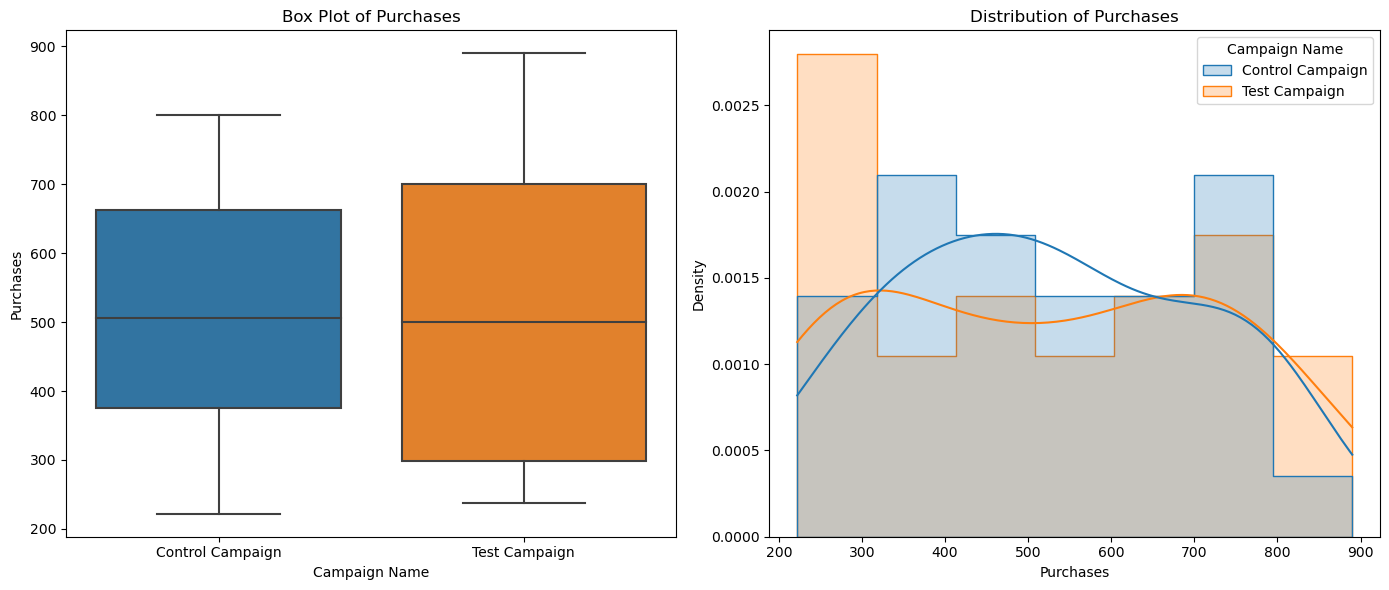

Website Clicks - Mann-Whitney U: Stat=349.0000, p-value=0.1373
No significant difference found for Website Clicks.



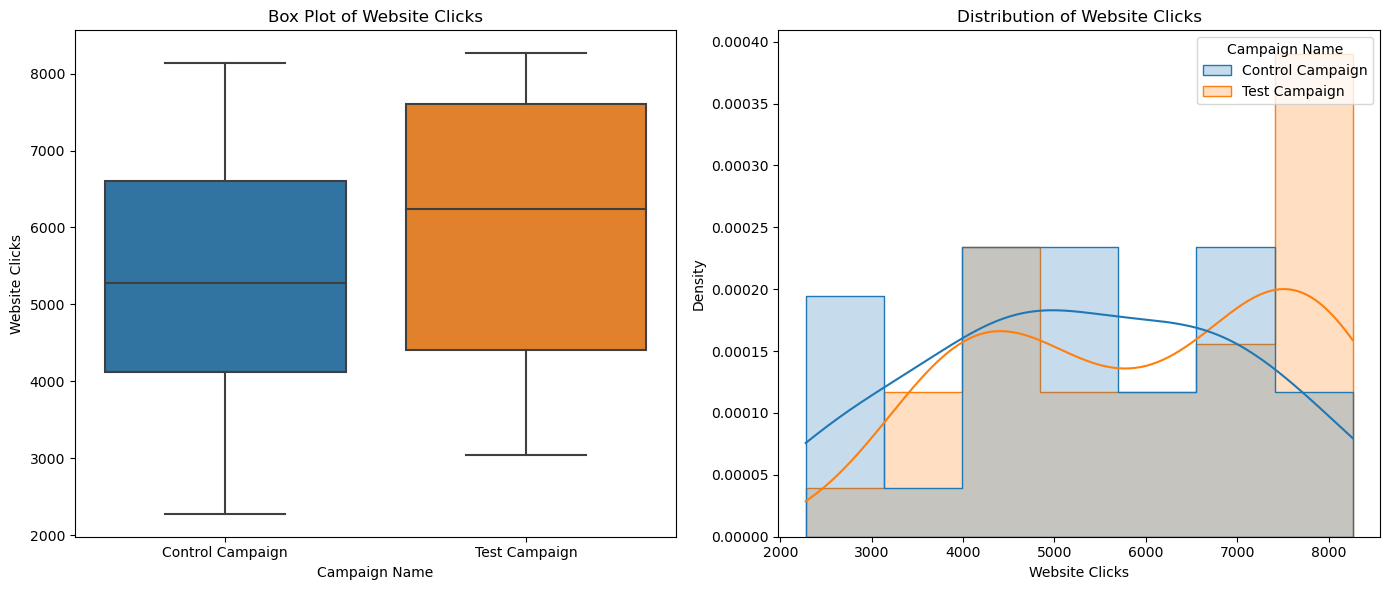

Amount Spent - T-Test: Stat=-2.9700, p-value=0.00433
Significant difference found for Amount Spent.



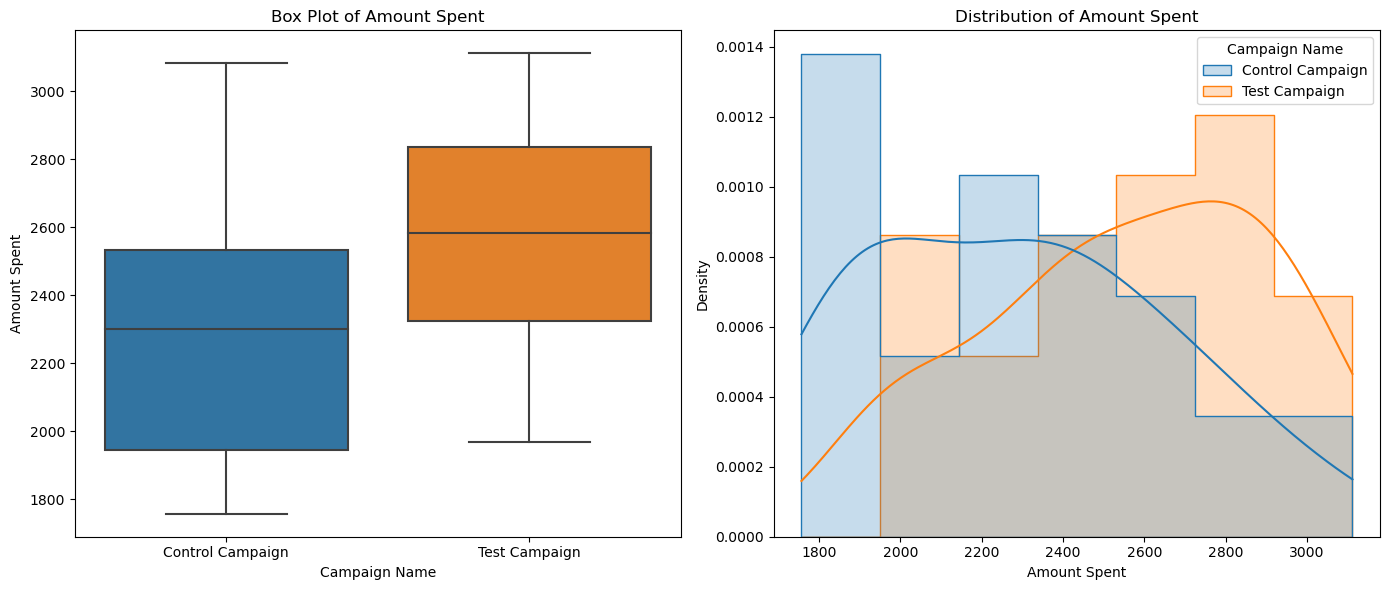

Number of Impressions - T-Test: Stat=4.9695, p-value=8.136e-06
Significant difference found for Number of Impressions.



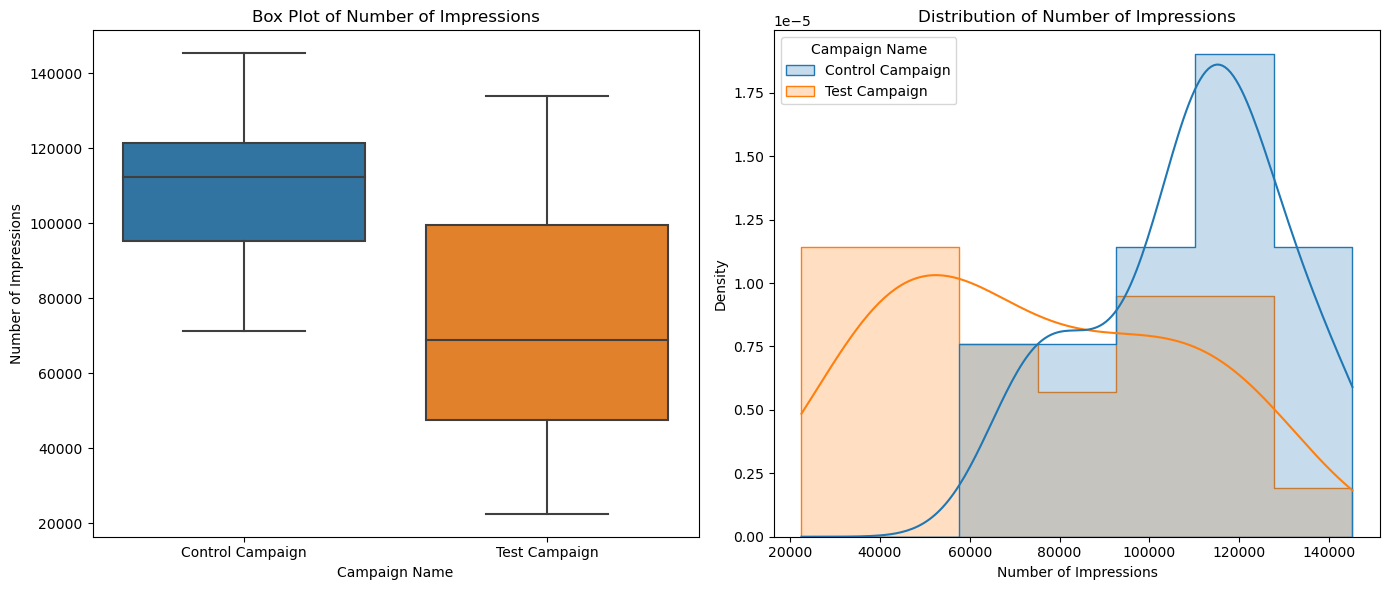

In [15]:
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming ab_data is your merged DataFrame

# Function for combined statistical testing and visualization
def analyze_and_visualize_all_metrics(df, metric):
    control_data = df[df['Campaign Name'] == 'Control Campaign'][metric].dropna()
    test_data = df[df['Campaign Name'] == 'Test Campaign'][metric].dropna()
    
    # Determine the appropriate test based on previous normality results
    if metric in ['Purchases', 'Website Clicks']:
        # Non-normally distributed metrics
        stat, p = mannwhitneyu(control_data, test_data)
        test_name = 'Mann-Whitney U'
    else:
        # Normally distributed metrics
        stat, p = ttest_ind(control_data, test_data, equal_var=False)
        test_name = 'T-Test'
    
    print(f"{metric} - {test_name}: Stat={stat:.4f}, p-value={p:.4g}")
    if p < 0.05:
        print(f"Significant difference found for {metric}.\n")
    else:
        print(f"No significant difference found for {metric}.\n")
    
    # Visualization: Boxplot and Distribution Plot
    plt.figure(figsize=(14, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Campaign Name', y=metric, data=df)
    plt.title(f'Box Plot of {metric}')
    
    # Distribution plot
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x=metric, hue='Campaign Name', kde=True, element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {metric}')
    
    plt.tight_layout()
    plt.show()

# List of all metrics to analyze and visualize
metrics_to_analyze = ['Purchases', 'Website Clicks', 'Amount Spent', 'Number of Impressions']

# Analyzing and visualizing each metric
for metric in metrics_to_analyze:
    analyze_and_visualize_all_metrics(ab_data, metric)


In [16]:
# Assuming an average revenue per purchase
average_revenue_per_purchase = 50  # Example value

# Function to calculate ROAS
def calculate_roas(df, campaign_name):
    campaign_data = df[df['Campaign Name'] == campaign_name]
    total_spent = campaign_data['Amount Spent'].sum()
    total_purchases = campaign_data['Purchases'].sum()
    total_revenue = total_purchases * average_revenue_per_purchase
    roas = total_revenue / total_spent
    return roas

# Calculating ROAS for both campaigns
roas_control = calculate_roas(ab_data, 'Control Campaign')
roas_test = calculate_roas(ab_data, 'Test Campaign')

print(f"ROAS for Control Campaign: {roas_control:.2f}")
print(f"ROAS for Test Campaign: {roas_test:.2f}")

# Deciding on the more cost-effective strategy
if roas_control > roas_test:
    print("The Control Campaign is more cost-effective in achieving marketing objectives.")
elif roas_control < roas_test:
    print("The Test Campaign is more cost-effective in achieving marketing objectives.")
else:
    print("Both campaigns are equally cost-effective.")


ROAS for Control Campaign: 11.42
ROAS for Test Campaign: 10.17
The Control Campaign is more cost-effective in achieving marketing objectives.


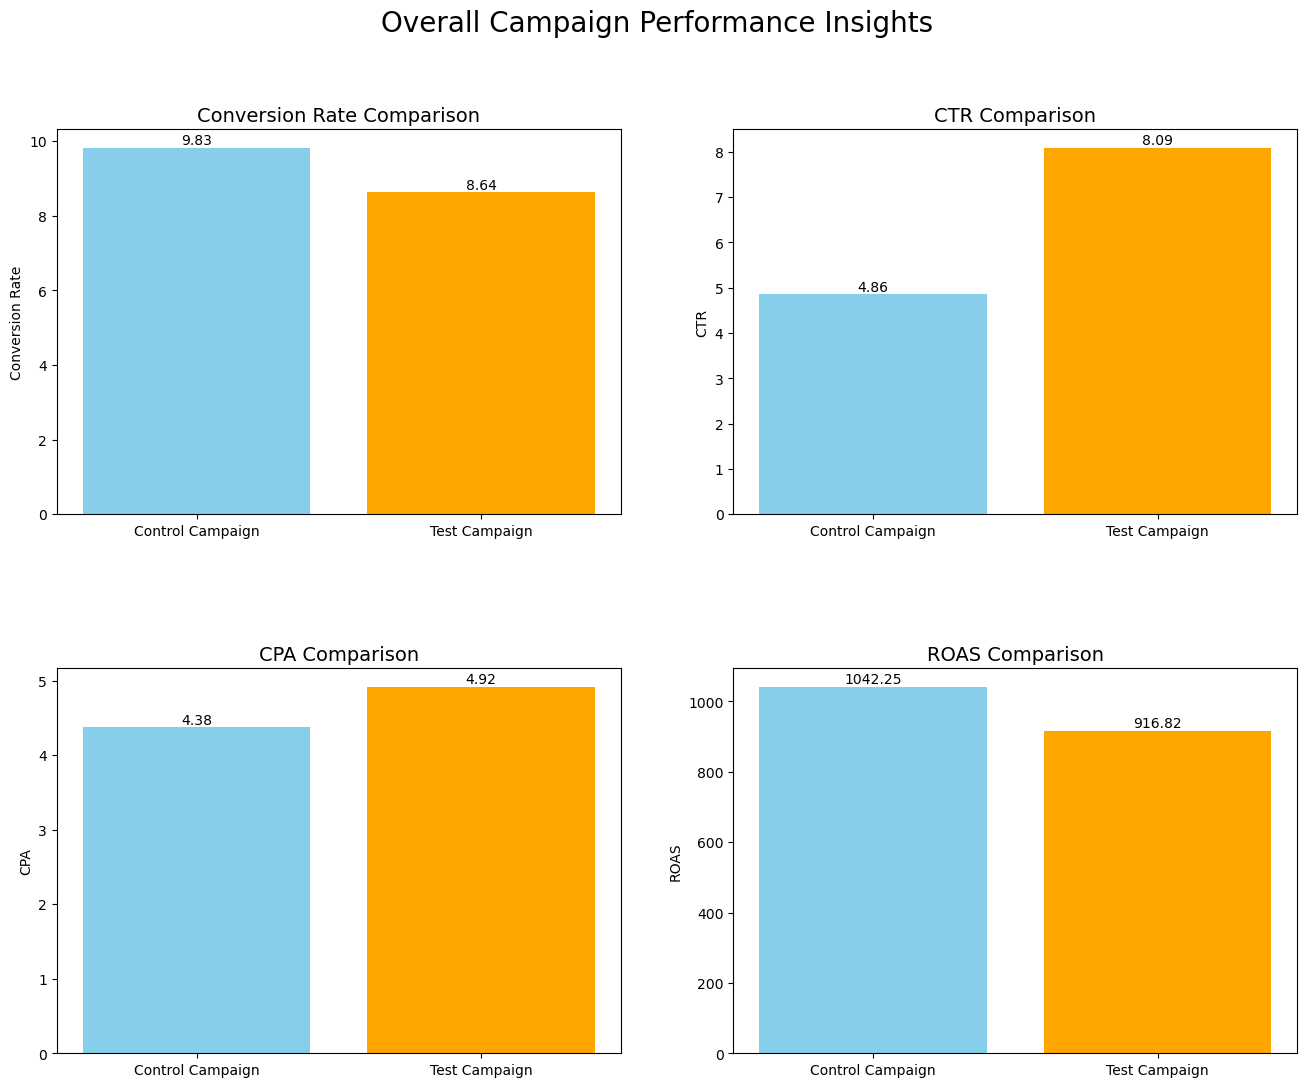

In [18]:
# Corrected Combined Visualization for Overall Insights

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4)  # Adjust space between plots

# Titles for subplots, matching keys in the metrics_data dictionary
titles = ['Conversion Rate', 'CTR', 'CPA', 'ROAS']

# Correct Data for plotting (assuming kpis dictionary is correctly populated as before)
metrics_data = {
    'Conversion Rate': [kpis['Conversion Rate']['Control Campaign'], kpis['Conversion Rate']['Test Campaign']],
    'CTR': [kpis['CTR']['Control Campaign'], kpis['CTR']['Test Campaign']],
    'CPA': [kpis['CPA']['Control Campaign'], kpis['CPA']['Test Campaign']],
    'ROAS': [kpis['ROAS']['Control Campaign'], kpis['ROAS']['Test Campaign']]
}

# Labels for the bar chart
campaign_labels = ['Control Campaign', 'Test Campaign']

# Plot each metric comparison using the corrected titles list
for ax, metric in zip(axes.flatten(), titles):
    data = metrics_data[metric]
    ax.bar(campaign_labels, data, color=['skyblue', 'orange'])
    ax.set_title(f"{metric} Comparison", fontsize=14)
    ax.set_ylabel(metric)
    for index, value in enumerate(data):
        ax.text(index, value, f"{value:.2f}", ha='center', va='bottom')

plt.suptitle('Overall Campaign Performance Insights', fontsize=20)
plt.show()
